<a href="https://colab.research.google.com/github/Gloria2002F/8672621-Air-Temperature-Assignment-csv/blob/main/Copy_of_Attachment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### using the link below. Download the data attached.

Using the link below. Download the data and upload it in your coolab repository.
https://drive.google.com/file/d/1MNebCCSclqHj09ijz8lDN4jJqFCh5Vmq/view?usp=drive_link

In [1]:
!pip install -q condacolab

In [2]:
import condacolab

In [3]:
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [6]:
import cartopy

In [2]:
!mamba install -q -c conda-forge cartopy

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy as cp
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [7]:
dat = pd.read_fwf('/content/GMet_location_avgSI.txt', names = ['Station', 'Longitude', 'Latitude', 'St'])


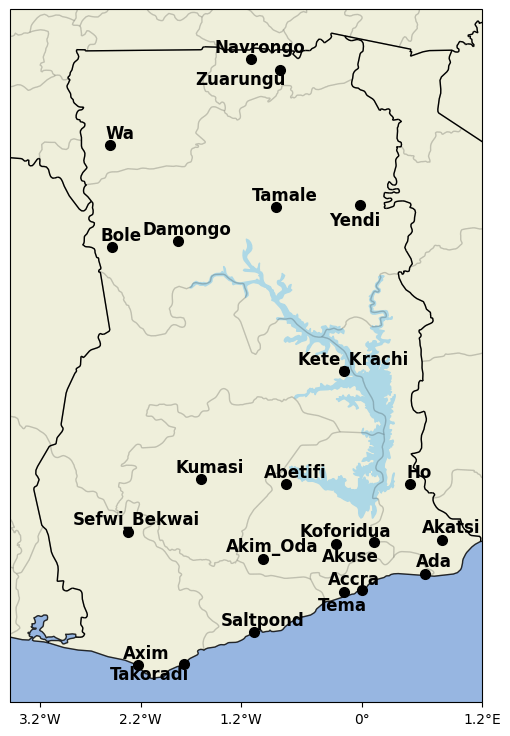

In [36]:
#####################  Plot for  study Area #######

plt.figure(figsize=(10,9))                         ###### Specifying the size of the figure
ax = plt.axes(projection = ccrs.PlateCarree())       ###### Specifying the type of geopatial plot
ax.add_feature(cf.COASTLINE,alpha=0.8)
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAKES ,color='lightblue')

ax.set_extent([-3.5,1.2,11.4,4.5])                   #### setting the map boundaries

ax.add_feature(cf.STATES, alpha= 0.1)               ####  adding territorial boundaries

ax.plot(dat.Longitude,
        dat.Latitude,
        'ro',                                       ##### plotting the longitudes and latitudes of the station
        ms=7,
        color = 'k')


s_stations = np.asarray(dat.Station)

for longitude, latitude, name in zip(dat.Longitude, dat.Latitude, s_stations):
    if name in ['Yendi']:
        ax.text(longitude - .05, latitude - .15,
                name,
                va='center',
                ha='center', transform=ccrs.Geodetic(), fontweight='bold',fontsize = '12')
    elif name in ['Zuarungu']:
          ax.text(longitude+ .05, latitude- .10,
                  name,
                  va='center',
                  ha='right', transform=ccrs.Geodetic(), fontweight='bold',fontsize='12')
    elif name in ['Tema']:
          ax.text(longitude+ .05, latitude- .15,
                  name,
                  va='center',
                  ha='right', transform=ccrs.Geodetic(), fontweight='bold',fontsize='12')
    elif name in ['Akuse']:
          ax.text(longitude+ .05, latitude- .15,
                  name,
                  va='center',
                  ha='right', transform=ccrs.Geodetic(), fontweight='bold',fontsize='12')
    elif name in ['Takoradi']:
          ax.text(longitude+ .05, latitude- .10,
                  name,
                  va='center',
                  ha='right', transform=ccrs.Geodetic(), fontweight='bold',fontsize='12')

    else:
        ax.text(longitude + .09, latitude + .12,
                name,
                va='center',
                ha='center', transform=ccrs.Geodetic(), fontweight='bold',fontsize = '12')

ax.set_xticks([-3.2,-2.2,-1.2,0,1.2], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
